# Importing 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy import where
from sqlalchemy import create_engine
import pymysql
from matplotlib import pyplot as plt
import plotly.express as px
import ydata_profiling
import seaborn as sns
from scipy.stats import pearsonr
import scipy.stats as stats
import scipy as sp
#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#cross validation
from sklearn.model_selection import train_test_split 
#Resampling
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE

#display all rows&columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
#Connection to data
connection = pymysql.connect(host='data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com', 
                             user='deepAnalytics',
                            password = 'Sqltask1234!',
                            database = 'Credit',
                            charset = 'utf8mb4',
                            cursorclass = pymysql.cursors.DictCursor)
#saving the data as a dataframe
df = pd.read_sql('SELECT * FROM credit', con = connection)

print("This is what our raw dataset looks like:")

df.head()

This is what our raw dataset looks like:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [4]:
print("There are no missing values in our data:")

df.isnull().sum()

There are no missing values in our data:


X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [5]:
# checking for duplicate rows
df_dupes = df[df.duplicated()]
print("These are our duplicated rows, these can be removed as two customers with exactly the same data is likely incorrect:")
df_dupes

These are our duplicated rows, these can be removed as two customers with exactly the same data is likely incorrect:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1981,150000,female,graduate school,1,38,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,default
2398,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2399,20000,female,university,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,default
2400,120000,female,university,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,default
2401,90000,female,university,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
2402,50000,female,university,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
2403,50000,male,university,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,not default
2404,50000,male,graduate school,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,not default
2405,500000,male,graduate school,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,not default
2406,100000,female,university,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,not default


In [6]:
#Dropping duplicate rows
df_2 = df.drop_duplicates()
#Changing column headers
df_2.columns = df_2.iloc[0]
#Removing column headers as a row entrant
df_3 = df_2.drop([0])

print("This is what our reformatted dataset (without dupes) looks like:")
df_3.head()

This is what our reformatted dataset (without dupes) looks like:


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
5,50000,male,university,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [7]:
#Changing strings to integer values for Default
df_3["default payment next month"] = df_3["default payment next month"].replace({"default": 1,
                              "not default": 0})

#Categorising columns for box plot use.
df_3['MARRIAGE'] = df_3['MARRIAGE'].replace({str(1): 'married', str(2): 'single', str(3) :'divorce', str(0):'others'})

#Changing the varible types for the columns
cols_float = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'BILL_AMT6','PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
cols_int = ['LIMIT_BAL','AGE', 'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
cols_cat = ['SEX','MARRIAGE', 'EDUCATION']
df_3[cols_float] = df_3[cols_float].astype(float)
df_3[cols_int] = df_3[cols_int].astype(int)
df_3['default payment next month'] = df_3['default payment next month'].astype(bool) 
df_3[cols_cat] = df_3[cols_cat].astype('category') 

In [8]:
print("This is what our dataset variables look like:")
#Checking variable types 
df_3.info()

This is what our dataset variables look like:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 1 to 2397
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   2396 non-null   int32   
 1   SEX                         2396 non-null   category
 2   EDUCATION                   2396 non-null   category
 3   MARRIAGE                    2396 non-null   category
 4   AGE                         2396 non-null   int32   
 5   PAY_0                       2396 non-null   int32   
 6   PAY_2                       2396 non-null   int32   
 7   PAY_3                       2396 non-null   int32   
 8   PAY_4                       2396 non-null   int32   
 9   PAY_5                       2396 non-null   int32   
 10  PAY_6                       2396 non-null   int32   
 11  BILL_AMT1                   2396 non-null   float64 
 12  BILL_AMT2                   23

# Exploratory Data Analysis

## Age

We can see a young general population with most of the customers between 25 - 35.

C:\Users\domsi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density of Customers Age')

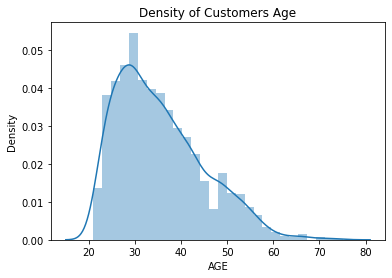

In [9]:
#Renaming DB
credit = df_3

#Creating a generation column
credit['Generation'] = pd.cut(x = credit['AGE'], bins = [17,26,42,58,77,86], labels = ['Gen Z', 'Millennial', 'Gen X','Baby Boomer','The Silent Generation'])

age_dist = sns.distplot(credit['AGE'])
age_dist.set_title('Density of Customers Age')

In [10]:
#Splitting dataset into default customers and non default customers
credit_defaults = credit[credit['default payment next month'] == 1]
credit_non_defaults = credit[credit['default payment next month'] == 0]

For customers who have defaulted: Mean age 36 years old with standard deviation of 10 years. Youngest client to default was 21 years old and the oldest 73 years old. Most customers are between 28 and 42 years old.

For clients who have not defaulted: Mean age 35 years old with standard deviation of 9 years. Youngest client not to default was 21 years old and the oldest 75 years old. Most customers are between 28 and 41 years old.



In [11]:
print('Defaulting customers Age: ')
credit_defaults['AGE'].describe()

Defaulting customers Age: 


count    519.000000
mean      36.132948
std       10.147543
min       21.000000
25%       28.000000
50%       35.000000
75%       42.000000
max       73.000000
Name: AGE, dtype: float64

In [12]:
print('Non-defaulting customers Age: ')
credit_non_defaults['AGE'].describe()

Non-defaulting customers Age: 


count    1877.000000
mean       35.222696
std         9.244053
min        21.000000
25%        28.000000
50%        34.000000
75%        41.000000
max        75.000000
Name: AGE, dtype: float64

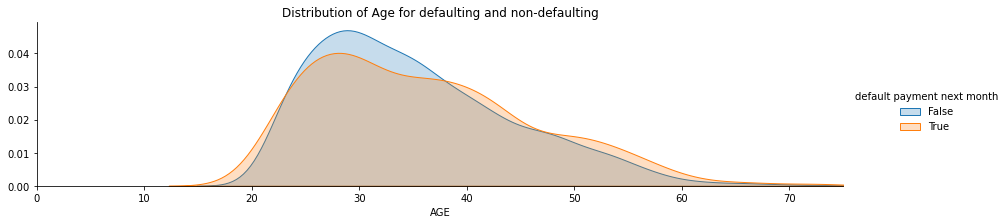

In [13]:
#Creating graph with age demographics for defaulting and non defaulting clients.
fig = sns.FacetGrid(credit, hue='default payment next month', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age for defaulting and non-defaulting')
fig.add_legend()

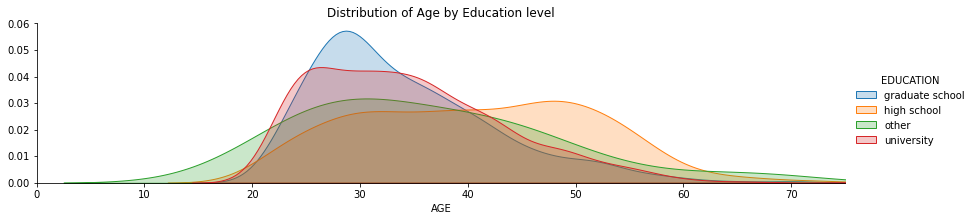

In [14]:
#Creating graph with age demographics for Education.
fig2 = sns.FacetGrid(credit, hue='EDUCATION', aspect=4)
fig2.map(sns.kdeplot, 'AGE', shade=True)
fig2.set(xlim=(0,oldest))
fig2.set(title='Distribution of Age by Education level')
fig2.add_legend()

Customers with education level of 'high school' have an older age demographic. University and Graduate school customers have more normal distributions with the majority of customers between 25 and 40 years old. 'Other' customers have a more even spread of ages.

C:\Users\domsi\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


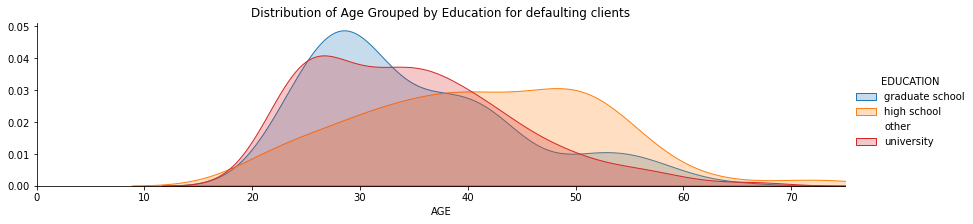

In [15]:
#Creating graph with age demographics for Education.
fig3 = sns.FacetGrid(credit_defaults, hue='EDUCATION', aspect=4)
fig3.map(sns.kdeplot, 'AGE', shade=True)
fig3.set(xlim=(0,oldest))
fig3.set(title='Distribution of Age Grouped by Education for defaulting clients')
fig3.add_legend()

The defaulting high-school customers have a different distribution to that of the general population showing a potential point of interest to investigate further. The non-defaulting graph mimics the general population so I have excluded the graph.

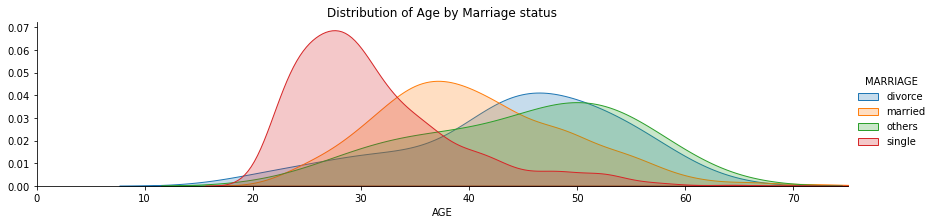

In [16]:
fig5 = sns.FacetGrid(credit, hue='MARRIAGE', aspect=4)
fig5.map(sns.kdeplot, 'AGE', shade=True)
fig5.set(xlim=(0,oldest))
fig5.set(title='Distribution of Age by Marriage status')
fig5.add_legend()

The 'Divorced' and 'other' customers have a skew towards older age. 'Single' people tend to be much younger and marriage has a normal distribution with a mean of 38 years old, all of this data is expected. 

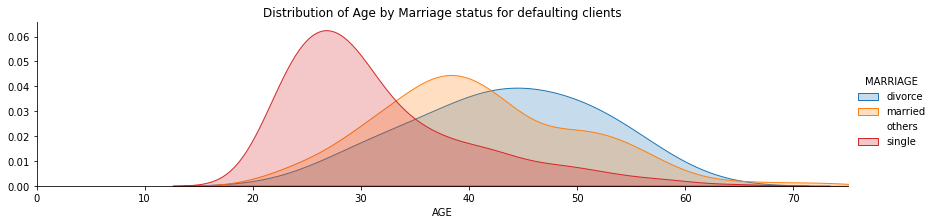

In [17]:
#Creating graph with age demographics for Marriage.
fig6 = sns.FacetGrid(credit_defaults, hue='MARRIAGE', aspect=4)
fig6.map(sns.kdeplot, 'AGE', shade=True)
fig6.set(xlim=(0,oldest))
fig6.set(title='Distribution of Age by Marriage status for defaulting clients')
fig6.add_legend()

High density of single defaulting people between the age of 23-35, however, this is not different to the general population. The non-defaulting graph mimics the general population so I have excluded the graph.

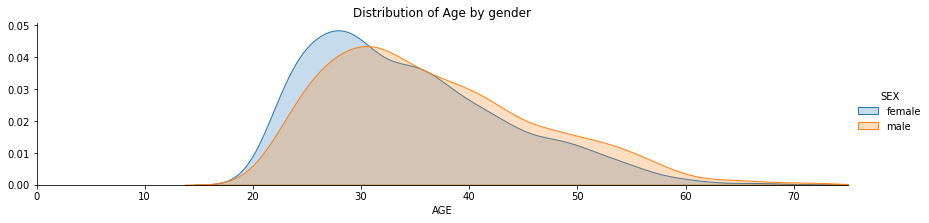

In [18]:
fig8 = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig8.map(sns.kdeplot, 'AGE', shade=True)
fig8.set(xlim=(0,oldest))
fig8.set(title='Distribution of Age by gender')
fig8.add_legend()

A higher proportion of Males are older than women.

#### Splitting age into Generations

Here we see how our defaulting population varies across generations:

(0.0, 1.0)

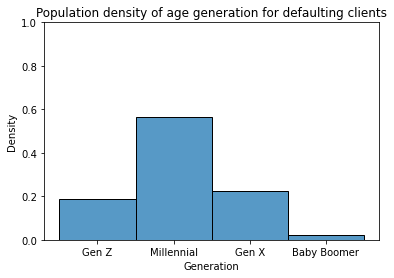

In [19]:
sns.histplot(x = credit_defaults['Generation'], multiple="dodge", 
                  stat = 'density', common_norm=False)
plt.title('Population density of age generation for defaulting clients')
plt.ylim(0,1)

Which is very similar to our non-defaulting population:

(0.0, 1.0)

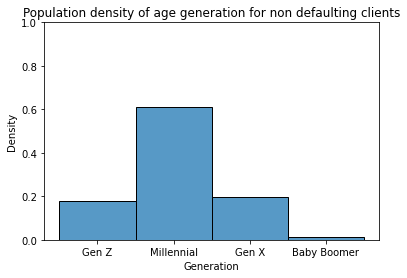

In [20]:
sns.histplot(x = credit_non_defaults['Generation'], multiple="dodge", 
                  stat = 'density', common_norm=False)
plt.title('Population density of age generation for non defaulting clients')
plt.ylim(0,1)

## Education

Most of our population are university (44.9%) or graduate school (37.9%) educated:

EDUCATION
graduate school     909
high school         392
other                18
university         1077
Name: EDUCATION, dtype: int64


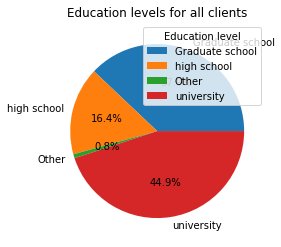

In [21]:
educ = credit.groupby('EDUCATION')['EDUCATION'].count()
edc_labels= ['Graduate school','high school','Other', 'university']
plt.pie(educ, autopct='%1.1f%%', labels =edc_labels)
plt.legend(title = 'Education level')
plt.title('Education levels for all clients')
print(educ)

Below we see our population densities:

(0.0, 1.0)

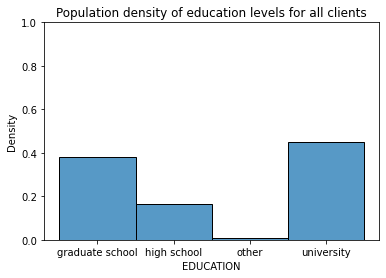

In [22]:
sns.histplot(x = credit['EDUCATION'], multiple="dodge", 
                  stat = 'density', common_norm=False)
plt.title('Population density of education levels for all clients')
plt.ylim(0,1)

Defaulting clients have a very similar distribution so education alone does not appear to be a large factor in whether a client defaults or not.

(0.0, 1.0)

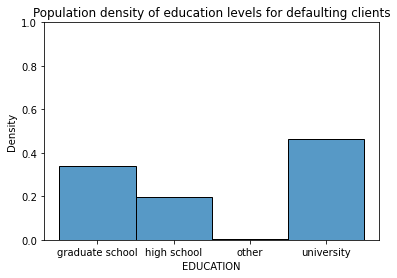

In [23]:
sns.histplot(x = credit_defaults['EDUCATION'], multiple="dodge", 
                  stat = 'density', common_norm=False)
plt.title('Population density of education levels for defaulting clients')
plt.ylim(0,1)

## Sex

In our dataset 57.8% are female and 42.2% are men.

(0.0, 1.0)

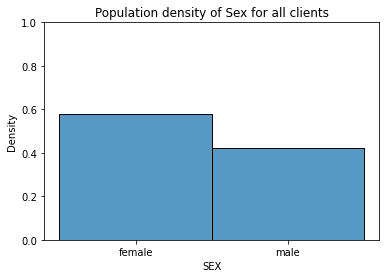

In [24]:
sns.histplot(x = credit['SEX'], multiple="dodge", 
                  stat = 'density', common_norm=False)
plt.title('Population density of Sex for all clients')
plt.ylim(0,1)

There is the same proportion of men and women in the defaulting group, gender alone doesn't appear to have an influencing factor.

### Maritial status

The population density for Males and Females across relationship status:

(0.0, 0.6)

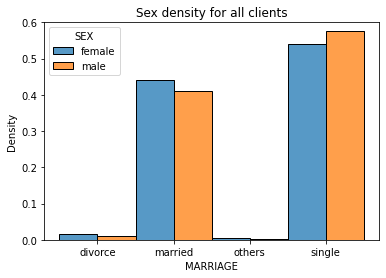

In [25]:
sns.histplot(x = credit['MARRIAGE'], hue=credit['SEX'], multiple="dodge", 
                  stat = 'density', common_norm=False)
plt.title('Sex density for all clients')
plt.ylim(0,0.6)

(0.0, 0.6)

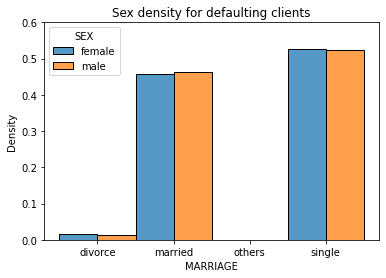

In [26]:
sns.histplot(x = credit_defaults['MARRIAGE'], hue=credit_defaults['SEX'], multiple="dodge", 
                  stat = 'density', common_norm=False)
plt.title('Sex density for defaulting clients')
plt.ylim(0,0.6)

Married males have a higher proportion in the defaulting set to the general set and single males have a smaller proportion, which could be a factor for default.

### Education

Text(0.5, 1.0, 'Sex density for clients based on education')

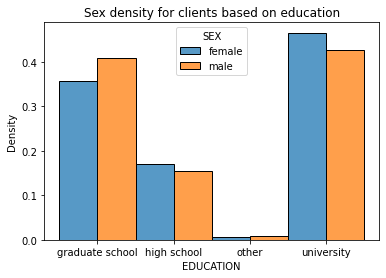

In [27]:
sns.histplot(x = credit['EDUCATION'], hue=credit['SEX'], multiple="dodge", 
                  stat = 'density', common_norm=False)
plt.title('Sex density for clients based on education')

Text(0.5, 1.0, 'Sex density for defaulting clients based on education')

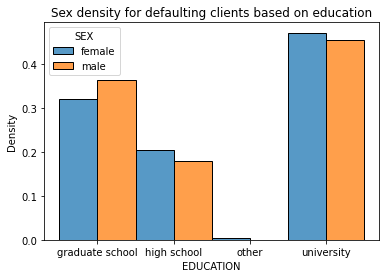

In [28]:
sns.histplot(x = credit_defaults['EDUCATION'], hue=credit_defaults['SEX'], multiple="dodge", 
                  stat = 'density', common_norm=False)
plt.title('Sex density for defaulting clients based on education')

Slightly lower proportion of graduate school males and females in the defaulting class and a higher proportion of high school educated males and females. There is a higher proportion of Univeristy educated males defaulting.

## Maritial status

Text(0.5, 1.0, 'Density of population marriage status')

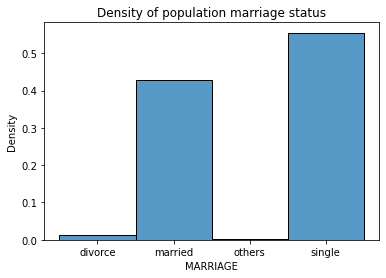

In [29]:
sns.histplot(x = credit['MARRIAGE'], multiple="dodge", 
                  stat = 'density', common_norm=False)
plt.title('Density of population marriage status')

As expected, most of the population are single or married, we don't have a lot of data on the divorced or 'other' status so any insights that may arise in these categories may not be valid.

## Credit Limit

Our total population's credit limits are below, the vast majority are below 200k with a large spike between 0 and 100k.

Text(0.5, 1.0, 'Density of total populations credit limits')

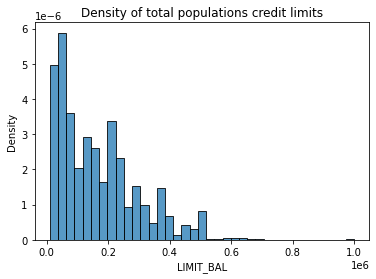

In [30]:
sns.histplot(x = credit['LIMIT_BAL'], multiple="dodge", 
                  stat = 'density', common_norm=False)
plt.title('Density of total populations credit limits')

(0.0, 1000000.0)

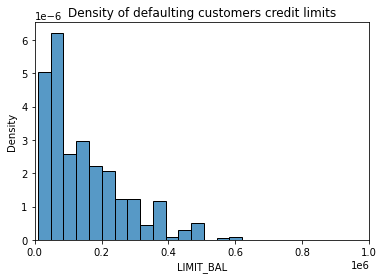

In [31]:
#Splitting limit balance data into default and non-defaulting customers
default_limit_bal = credit_defaults['LIMIT_BAL']
non_default_limit_bal =credit_non_defaults['LIMIT_BAL']

sns.histplot(x = credit_defaults['LIMIT_BAL'], multiple="dodge", 
                  stat = 'density', common_norm=False)
plt.title('Density of defaulting customers credit limits')
plt.xlim(0,1000000)

We see a higher density of the defaulting population with smaller credit limits.

In [32]:
print('Defaulting population credit limit information:')
default_limit_bal.describe()

Defaulting population credit limit information:


count       519.000000
mean     145067.437380
std      121343.609247
min       10000.000000
25%       50000.000000
50%      110000.000000
75%      210000.000000
max      620000.000000
Name: LIMIT_BAL, dtype: float64

In [33]:
print('Non-defaulting population credit limit information:')
non_default_limit_bal.describe()

Non-defaulting population credit limit information:


count       1877.000000
mean      171576.984550
std       131109.607879
min        10000.000000
25%        60000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

Higher mean credit limit for those who didnt default, and a much higher maximum limit. Revolving debt looks to be occuring where clients can choose to not default by increasing their debt instead of paying it off that month.

### Maritial status

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='MARRIAGE'>

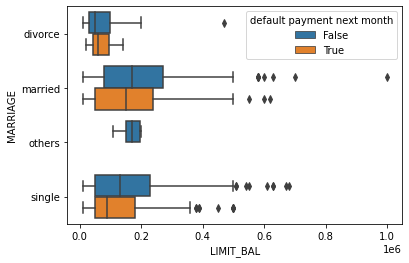

In [34]:
sns.boxplot(data = credit, x = 'LIMIT_BAL', y = 'MARRIAGE', hue='default payment next month')

'Other' and 'Divorced' are small data samples, the defaulting populations in 'Married' and 'Single' groups have smaller means than the non-defaulting population. Lots of outliers for 'Married' and 'Single' who have both defaulted and not defaulted. These outliers imply there are huge credit limits in place where there shouldnt be.

### Education

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='EDUCATION'>

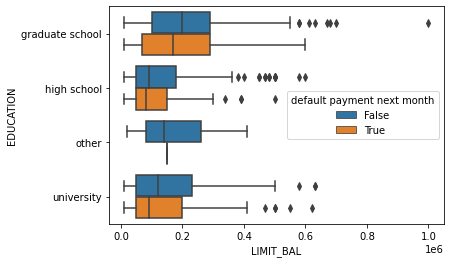

In [35]:
sns.boxplot(data = credit, x = 'LIMIT_BAL', y = 'EDUCATION', hue='default payment next month')

Again we see the defaulting demographic have smaller mean credit limits compared to the non-defaulting group. The credit limits relate to expected salaries of the different education levels (i.e Graduate schools would have an expected highest salary, they have the highest mean credit limits).

### Sex

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='SEX'>

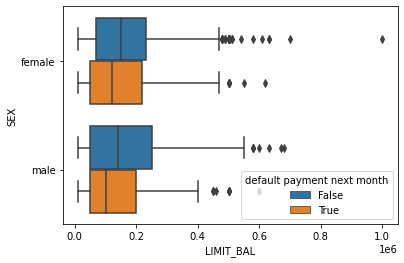

In [36]:
sns.boxplot(data = credit, x = 'LIMIT_BAL', y = 'SEX', hue='default payment next month')

Defaulting men have the smallest mean credit limits, non-defaulting females have a large number of outliers once again implying statistically large credit limits.

### Age

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Generation'>

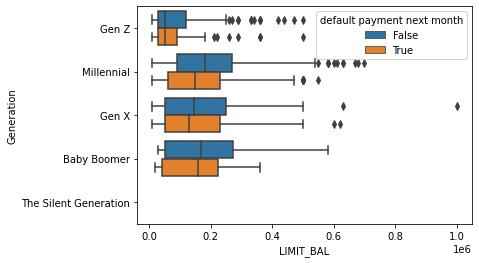

In [37]:
sns.boxplot(data = credit, x = 'LIMIT_BAL', y = 'Generation', hue='default payment next month')

Defaulting groups again have smaller credit limits. The mean credit limits increase with the generations. Lots of outliers for Gen Z customers, again implying some credit limits they are given are exceedingly high and most likely unmanageable.

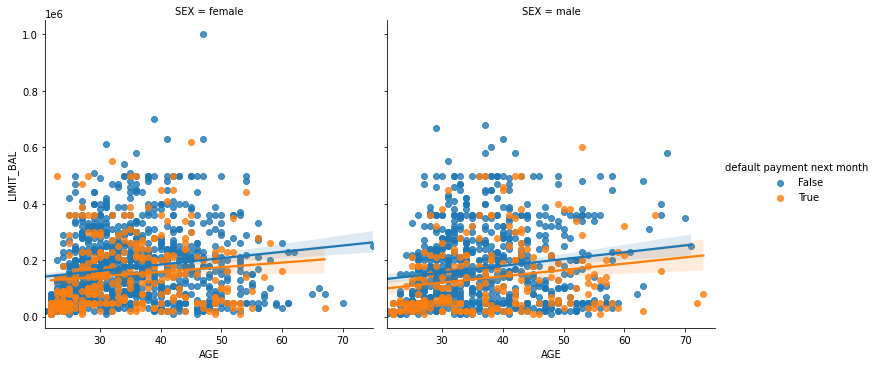

In [38]:
sns.lmplot(
    data=credit, x="AGE", y="LIMIT_BAL",
    col="SEX", hue="default payment next month"
)

In [39]:

#Creating correlation matrices to see any correlation between Sex, age, credit limit and Defaulting
df_for_corr_matrix_male = credit[credit['SEX'] == 'male']
df_for_corr_matrix_female = credit[credit['SEX'] == 'female']
#Choosing variables
df_for_corr_matrix_male = df_for_corr_matrix_male[['AGE','LIMIT_BAL', 'default payment next month' ]]
df_for_corr_matrix_female = df_for_corr_matrix_female[['AGE','LIMIT_BAL','default payment next month']]
#Creating the matrices
corr_male = df_for_corr_matrix_male[['AGE','LIMIT_BAL']].corr()
corr_female = df_for_corr_matrix_female[['AGE','LIMIT_BAL']].corr()

#Splitting between defaulting and non-defaulting male and females
df_for_corr_matrix_male_default = df_for_corr_matrix_male[df_for_corr_matrix_male["default payment next month"] == True]
df_for_corr_matrix_male_no_default = df_for_corr_matrix_male[df_for_corr_matrix_male["default payment next month"] == False]

df_for_corr_matrix_female_default = df_for_corr_matrix_female[df_for_corr_matrix_female["default payment next month"] == True]
df_for_corr_matrix_female_no_default = df_for_corr_matrix_female[df_for_corr_matrix_female["default payment next month"] == False]

df_for_corr_matrix_male_default = df_for_corr_matrix_male_default[['AGE','LIMIT_BAL']]
df_for_corr_matrix_male_no_default = df_for_corr_matrix_male_no_default[['AGE','LIMIT_BAL']]

df_for_corr_matrix_female_default = df_for_corr_matrix_female_default[['AGE','LIMIT_BAL']]
df_for_corr_matrix_female_no_default = df_for_corr_matrix_female_no_default[['AGE','LIMIT_BAL']]

corr_male_default = df_for_corr_matrix_male_default.corr()
corr_male_no_default = df_for_corr_matrix_male_no_default.corr()

corr_female_default = df_for_corr_matrix_female_default.corr()
corr_female_no_default = df_for_corr_matrix_female_no_default.corr()

Below we see correlation matrices between age and credit limit for males across the whole population, and the defaulting populations:

In [40]:
print('Correlation matrix for all males:')
corr_male

Correlation matrix for all males:


,AGE,LIMIT_BAL
0,,
AGE,1.000000,0.163208
LIMIT_BAL,0.163208,1.000000


In [41]:
print('Correlation matrix for defaulting males:')
corr_male_default

Correlation matrix for defaulting males:


,AGE,LIMIT_BAL
0,,
AGE,1.000000,0.199542
LIMIT_BAL,0.199542,1.000000


The correlation between age and credit limit for defaulting men is 0.2 where the correlation for the general male population (and non-defaulting is very similar) is 0.16. We would expect the credit limit to increase as age increases, but it is interesting there is a slightly stronger case in the defaulting male group.

Below we see correlation matrices between age and credit limit for females across the whole population, and the defaulting populations:

In [42]:
print('correlation matrix for females:')
corr_female

correlation matrix for females:


,AGE,LIMIT_BAL
0,,
AGE,1.000000,0.152838
LIMIT_BAL,0.152838,1.000000


In [43]:
print('Correlation matrix for defaulting females:')
corr_female_default

Correlation matrix for defaulting females:


,AGE,LIMIT_BAL
0,,
AGE,1.000000,0.127159
LIMIT_BAL,0.127159,1.000000


Interestingly the opposite is true for females. The defaulting population has a weaker age to credit limit correlation than the general population. We are now going to check the credit limits per generation.

In [44]:
#Set the credit limit brackets
bin_labels_limit = ['10,000 - 29,999', '30,000 - 49,999','50,000 - 69,999', '70,000 - 99,999', 
                    '100,000 - 139,999', '140,000 - 179,999', '180,000 - 209,999', '210,000 - 259,999',
                    '260,000 - 359,999', '360,000 - 1,000,000']

#Create a new column to split the credit limits into brackets
credit['limit'] = pd.qcut(credit['LIMIT_BAL'],q=10,labels = bin_labels_limit)

#Define datasets for each generation
gen_z = credit[credit['Generation'] == 'Gen Z']
gen_x = credit[credit['Generation'] == 'Gen X']
millen = credit[credit['Generation'] == 'Millennial']
b_boom = credit[credit['Generation'] == 'Baby Boomer']
s_gen = credit[credit['Generation'] == 'The Silent Generation']

gen_list = [gen_z,millen,gen_x,b_boom,s_gen]

gen_list_str = ['Gen Z', 'Millennial', 'Gen X','Baby Boomer','The Silent Generation']
#Create a dataframe for the most common credit limits in each generation
mode_cred_lim_df = pd.DataFrame({'Gen Z' : [gen_z["limit"].mode()],
                                 'Millennial' : [millen["limit"].mode()],
                                'Gen X' : [gen_x["limit"].mode()],
                                 'Baby Boomer' : [b_boom["limit"].mode()],
                                 'The Silent Generation' : [s_gen["limit"].mode()]}, 
                                columns=gen_list_str)
print('The mode credit limits per generation')
mode_cred_lim_df

The mode credit limits per generation


,Gen Z,Millennial,Gen X,Baby Boomer,The Silent Generation
0,"0 10,000 - 29,999 Name: limit, dtype: categ...","0 260,000 - 359,999 Name: limit, dtype: cat...","0 30,000 - 49,999 Name: limit, dtype: categ...","0 210,000 - 259,999 Name: limit, dtype: cat...","Series([], Name: limit, dtype: category Catego..."


The most common credit limit for Gen Z is 10k- 30k, Millenials 260k-360k, Gen X 30k-50k, Baby Boomers 210k-260k. Here the Millenial mode is of most interest with a high bracket.

<ipython-input-45-bf75c9b6e2cb>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig9.set_xticklabels(labels = bin_labels_limit, rotation='vertical')


Text(0.5, 1.0, 'A linegraph showing how the age of customers vary with their credit limits')

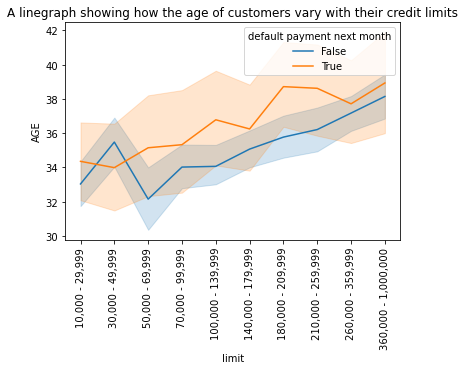

In [45]:
#Sub setting the data by credit limit

cred_lim_30 = credit[credit['limit'] == '10,000 - 29,999']
cred_lim_50 = credit[credit['limit'] == '30,000 - 49,999']
cred_lim_70 = credit[credit['limit'] == '50,000 - 69,999'] 
cred_lim_100 = credit[credit['limit'] == '70,000 - 99,999']
cred_lim_140 = credit[credit['limit'] == '100,000 - 139,999']
cred_lim_180 = credit[credit['limit'] == '140,000 - 179,999']
cred_lim_210 = credit[credit['limit'] == '180,000 - 209,999']
cred_lim_260 = credit[credit['limit'] == '210,000 - 259,999']
cred_lim_360 = credit[credit['limit'] == '260,000 - 359,999']
cred_lim_1m = credit[credit['limit'] == '360,000 - 1,000,000']

#ploting
fig9 = sns.lineplot(data=credit, x='limit', y='AGE', hue='default payment next month')
fig9.set_xticklabels(labels = bin_labels_limit, rotation='vertical')
fig9.set_title('A linegraph showing how the age of customers vary with their credit limits')

We can see an increase in the mean age of customers as credit limits increase, more clearly in those of defaulting clients, with a higher mean age in every bracket except 30k-50k. This jump in mean age goes against the trend of the rest of the data so we will find out what is causing it.

In [46]:
#Descriptons of this bracket
cred_lim_30['AGE'].describe()

count    318.000000
mean      33.421384
std       10.622804
min       21.000000
25%       24.000000
50%       30.500000
75%       41.000000
max       67.000000
Name: AGE, dtype: float64

In [47]:
cred_lim_30.groupby(['Generation','default payment next month'])['default payment next month'].count()

Generation             default payment next month
Gen Z                  False                         90
                       True                          34
Millennial             False                         85
                       True                          38
Gen X                  False                         49
                       True                          18
Baby Boomer            False                          1
                       True                           3
The Silent Generation  False                          0
                       True                           0
Name: default payment next month, dtype: int64

This is our information on the population with a credit limit between 30k and 50k:

In [48]:
cred_lim_50['AGE'].describe()

count    316.000000
mean      35.110759
std       11.263528
min       22.000000
25%       25.000000
50%       32.000000
75%       44.000000
max       72.000000
Name: AGE, dtype: float64

In [49]:
cred_lim_50.groupby(['Generation','default payment next month'])['default payment next month'].count()

Generation             default payment next month
Gen Z                  False                         80
                       True                          26
Millennial             False                         90
                       True                          34
Gen X                  False                         62
                       True                          17
Baby Boomer            False                          6
                       True                           1
The Silent Generation  False                          0
                       True                           0
Name: default payment next month, dtype: int64

This is our information on the population with a credit limit between 50k and 70k:

In [50]:
cred_lim_70.groupby(['Generation','default payment next month'])['default payment next month'].count()

Generation             default payment next month
Gen Z                  False                         26
                       True                           5
Millennial             False                         50
                       True                          21
Gen X                  False                         10
                       True                           8
Baby Boomer            False                          0
                       True                           0
The Silent Generation  False                          0
                       True                           0
Name: default payment next month, dtype: int64

We can see in the 30k-50k bracket there is a larger proportion of 'Gen X' which has caused the mean age in this credit limit bracket to jump up.

### Default customers

<Figure size 1440x1440 with 0 Axes>

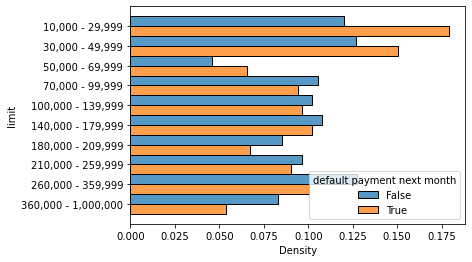

<Figure size 1440x1440 with 0 Axes>

In [51]:
sns.histplot(y = credit['limit'], hue=credit['default payment next month'], multiple="dodge", 
                  stat = 'density', common_norm=False)
plt.figure(figsize=(20,20))

Much higher defaulting rate for customers with credit limits between 10,000 and 50,000. Lets focus on these brackets.

In [52]:
cred_lim_10_50 = pd.concat([cred_lim_30,cred_lim_50])

See below for the mode demographics in this group, most are male, university educated, single and 24 years old.

In [53]:
cred_lim_10_50.mode()[['LIMIT_BAL', 'SEX', 'EDUCATION','MARRIAGE','AGE']]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,50000,male,university,single,24


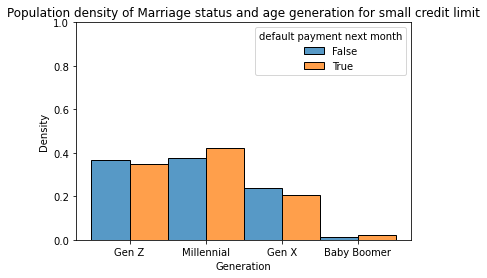

In [54]:
sns.histplot(x = cred_lim_10_50['Generation'], hue=cred_lim_10_50['default payment next month'], multiple="dodge", 
                  stat = 'density', common_norm=False)
plt.title('Population density of Marriage status and age generation for small credit limit')
plt.ylim(0,1)
plt.tick_params(axis='x', labelsize='10')

We see most of the population with a credit limit below 50k is Millenial/Gen Z which is younger.
The below graph shows a large portion being mid 20's.

<AxesSubplot:xlabel='AGE', ylabel='Density'>

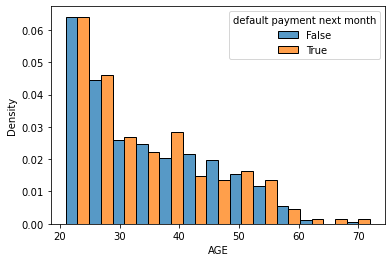

In [55]:
sns.histplot(x = cred_lim_10_50['AGE'], hue=cred_lim_10_50['default payment next month'], multiple="dodge", 
                  stat = 'density', common_norm=False)

## Repayment

### Estimating total debt

In [56]:
#Creating a dictionary to relabel the numbers to categorys for easier understanding
repayment_dict = {-2:'No consumption',
                                                   -1:'Paid in full',
                                                     0:'The use of revolving credit',
                                                    1:'One month payment delay',
                                                    2:'Two month payment delay',
                                                    3:'Three month payment delay',
                                                    4:'Four month payment delay',
                                                    5:'Five month payment delay',
                                                    6:'Six month payment delay',
                                                    7:'Seven month payment delay',
                                                    8: 'Eight month payment delay',
                                                    9: 'Nine '}

#Creating a new DF with columns renamed
credit_new = credit.copy()

#Renaming columns
credit_new['Repayment September'] = credit_new['PAY_0'].replace(repayment_dict)
credit_new['Repayment August'] = credit_new['PAY_2'].replace(repayment_dict)
credit_new['Repayment July'] = credit_new['PAY_3'].replace(repayment_dict)
credit_new['Repayment June'] = credit_new['PAY_4'].replace(repayment_dict)
credit_new['Repayment May'] = credit_new['PAY_5'].replace(repayment_dict)
credit_new['Repayment April'] = credit_new['PAY_6'].replace(repayment_dict)

#Renaming columns
credit_new['Bill September'] = credit_new['BILL_AMT1']
credit_new['Bill August'] = credit_new['BILL_AMT2']
credit_new['Bill July'] = credit_new['BILL_AMT3']
credit_new['Bill June'] = credit_new['BILL_AMT4']
credit_new['Bill May'] = credit_new['BILL_AMT5']
credit_new['Bill April'] = credit_new['BILL_AMT6']

#Renaming columns 
credit_new['Paid September'] = credit_new['PAY_AMT1']
credit_new['Paid August'] = credit_new['PAY_AMT2']
credit_new['Paid July'] = credit_new['PAY_AMT3']
credit_new['Paid June'] = credit_new['PAY_AMT4']
credit_new['Paid May'] = credit_new['PAY_AMT5']
credit_new['Paid April'] = credit_new['PAY_AMT6']

#Dropping old columns
credit_new = credit_new.drop(columns =[ 'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2','BILL_AMT3',
                                       'BILL_AMT4','BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                                      'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

#creating an empty dataset for the totals
df_totals = pd.DataFrame()
#Creating a total of bills dictionary
bill_totals_data = {'April': credit_new['Bill April'].sum(),
               'May': credit_new['Bill May'].sum(),
               'June': credit_new['Bill June'].sum(),
               'July': credit_new['Bill July'].sum(),
               'August': credit_new['Bill August'].sum(),
               'September': credit_new['Bill September'].sum()
              }
#Creating a totals paid dictionary
paid_totals_data = {'April': credit_new['Paid April'].sum(),
               'May': credit_new['Paid May'].sum(),
               'June': credit_new['Paid June'].sum(),
               'July': credit_new['Paid July'].sum(),
               'August': credit_new['Paid August'].sum(),
               'September': credit_new['Paid September'].sum()
              }
df_totals = df_totals.append(bill_totals_data, ignore_index=True)
df_totals = df_totals.append(paid_totals_data, ignore_index=True)

row_names = ['Bills','Paid']
df_totals.index =row_names

df_totals.loc['Outstanding owed'] =df_totals.loc['Paid'] - df_totals.loc['Bills']
df_totals.loc['Outstanding owed per customer'] =df_totals.loc['Outstanding owed']/2396
df_totals.transpose()

,Bills,Paid,Outstanding owed,Outstanding owed per customer
April,92958327.0,12339229.0,-80619098.0,-33647.369783
August,117662587.0,12507241.0,-105155346.0,-43887.873957
July,109046557.0,11633643.0,-97412914.0,-40656.474958
June,99540098.0,11719866.0,-87820232.0,-36652.851419
May,95822809.0,11944007.0,-83878802.0,-35007.847245
September,122673765.0,13295267.0,-109378498.0,-45650.458264


We have added the total amounts of the customer bills and the amount paid by the customer to get the below figures. These are not accurate but give a rough idea as to the amount of debt that needs to be recovered.

We can see from the above that every month the company has a deficit of between 80 and 109 million dollars. 

### Average monthly repayments and consumptions

ASSUMPTION:
In the below we are assuming that the Bill for a month = Bill previous month + consumption previous month - Paid current month.

This can be adjusted upon clarification.

In [57]:
credit_new['Average monthly repayment'] = (credit_new['Paid April'] +credit_new['Paid May'] + credit_new['Paid June']+
                                        credit_new['Paid July'] +credit_new['Paid August']  + credit_new['Paid September'])/6      

credit_new['April consumption'] = credit_new['Bill May'] - (credit_new['Bill April'] - credit_new['Paid May'])
credit_new['May consumption'] = credit_new['Bill June'] - (credit_new['Bill May'] - credit_new['Paid June'])
credit_new['June consumption'] = credit_new['Bill July'] - (credit_new['Bill June'] - credit_new['Paid July'])
credit_new['July consumption'] = credit_new['Bill August'] - (credit_new['Bill July'] - credit_new['Paid August'])
credit_new['August consumption'] = credit_new['Bill September'] - (credit_new['Bill August'] - credit_new['Paid September'])

total_consump = (credit_new['April consumption']+credit_new['May consumption']+ credit_new['June consumption']+credit_new['July consumption']+
                 credit_new['August consumption'])
credit_new['Average monthly consumption'] = total_consump/5

ASSUMPTION: The months to repayment column below is based on the september bill as the final bill. We are using the average monthly repayments (from the provided months) and the average monthly consumption (as detailed above).

In [58]:
def months_to_repay(bill, avg_repayment, avg_consump):
    if avg_consump < 0:
        return 'Negative consumption'
    if avg_repayment > avg_consump >= 0:
        return bill/(avg_repayment - avg_consump)
    if avg_repayment == avg_consump:
        return 'Repayment equal to consumption, need to reduce consumption or increase repayment'
    if avg_repayment < avg_consump:
        return 'Repayment less than consumption, need to reduce consumption or increase repayment'

Here we have examples of clients with a 'negative consumption'.  In each instance there is a large 'negative consumption' on one month I am assuming that this is a form of debt relief provided by the company to the client. As such, this data can be removed from our dataset going forward as it will provide erroneous results in our model.

In [59]:
neg_consumption = credit_new[credit_new['Average monthly consumption']< 0]
neg_consumption.transpose()

,1009,1509,1689,1990
0,,,,
LIMIT_BAL,30000,480000,20000,50000
SEX,male,male,male,male
EDUCATION,university,high school,university,university
MARRIAGE,single,single,single,single
AGE,34,53,23,42
default payment next month,False,False,False,True
Generation,Millennial,Gen X,Gen Z,Millennial
limit,"10,000 - 29,999","360,000 - 1,000,000","10,000 - 29,999","30,000 - 49,999"
Repayment September,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit


In [60]:
#Removing clients with negative consumption
credit_new = credit_new.merge(neg_consumption, how = 'left', indicator = True)
credit_new = credit_new[credit_new['_merge'] == 'left_only']
credit_new = credit_new.drop(columns = ['_merge'])
#Creating a column for months to repay
credit_new['Months to repayment'] = credit_new.apply(lambda row: months_to_repay(row['Bill September'], row['Average monthly repayment'],row['Average monthly consumption']), axis=1)

In [61]:
#change num months for repayment threshold, currently at 12 months
payback_possible = []
for num_months in credit_new['Months to repayment']:
    if type(num_months) == int or type(num_months) == float :
        if num_months <=12:
            payback_possible.append(True)
        if num_months >12:
            payback_possible.append(False)
    if type(num_months) == str:
        payback_possible.append(False)
 #Define a new column for whether payback is possible       
credit_new['Payback possible'] = payback_possible 

#Splitting clients who have defaulted and those who havent.
df_default = credit_new[credit_new['default payment next month'] == True]
df_non_default = credit_new[credit_new['default payment next month'] == False]

#is payback possible for defaulted clients?
df_default_payback_possible = df_default[df_default['Payback possible'] == True]
df_default_payback_not_possible = df_default[df_default['Payback possible'] == False]

Here we have a dataframe of 63 clients who have defaulted but payback of their debts is possible within 12 months. This assumes the customers will keep their repayment rate at a minimum of their current monthly average, and their consumption rate can not exeed their current monthly average.

In [62]:
df_default_payback_possible.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month,Generation,limit,Repayment September,Repayment August,Repayment July,Repayment June,Repayment May,Repayment April,Bill September,Bill August,Bill July,Bill June,Bill May,Bill April,Paid September,Paid August,Paid July,Paid June,Paid May,Paid April,Average monthly repayment,April consumption,May consumption,June consumption,July consumption,August consumption,Average monthly consumption,Months to repayment,Payback possible
1,120000,female,university,single,26,True,Gen Z,"100,000 - 139,999",Paid in full,Two month payment delay,The use of revolving credit,The use of revolving credit,The use of revolving credit,Two month payment delay,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,833.333333,194.0,817.0,410.0,43.0,957.0,484.2,7.68188,True
26,60000,male,graduate school,single,27,True,Millennial,"50,000 - 69,999",One month payment delay,No consumption,Paid in full,Paid in full,Paid in full,Paid in full,-109.0,-425.0,259.0,-57.0,127.0,-189.0,0.0,1000.0,0.0,500.0,0.0,1000.0,416.666667,316.0,316.0,316.0,316.0,316.0,316.0,-1.08278,True
66,10000,male,university,married,56,True,Gen X,"10,000 - 29,999",Two month payment delay,Two month payment delay,Two month payment delay,The use of revolving credit,The use of revolving credit,The use of revolving credit,2097.0,4193.0,3978.0,4062.0,4196.0,4326.0,2300.0,0.0,150.0,200.0,200.0,160.0,501.666667,70.0,66.0,66.0,215.0,204.0,124.2,5.55546,True
128,50000,male,university,married,51,True,Gen X,"30,000 - 49,999",The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,3347.0,3899.0,4503.0,5347.0,6375.0,7077.0,1000.0,1066.0,1300.0,1500.0,1200.0,134.0,1033.333333,498.0,472.0,456.0,462.0,448.0,467.2,5.91203,True
211,210000,female,graduate school,married,38,True,Millennial,"180,000 - 209,999",One month payment delay,No consumption,Paid in full,The use of revolving credit,Paid in full,Paid in full,0.0,0.0,250.0,123.0,789.0,1222.0,0.0,250.0,0.0,789.0,1222.0,9616.0,1979.500000,789.0,123.0,127.0,0.0,0.0,207.8,0,True


The below list shows 455 defaulted clients who are unable to payback their debts within 12 months.

In [63]:
df_default_payback_not_possible.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month,Generation,limit,Repayment September,Repayment August,Repayment July,Repayment June,Repayment May,Repayment April,Bill September,Bill August,Bill July,Bill June,Bill May,Bill April,Paid September,Paid August,Paid July,Paid June,Paid May,Paid April,Average monthly repayment,April consumption,May consumption,June consumption,July consumption,August consumption,Average monthly consumption,Months to repayment,Payback possible
0,20000,female,university,married,24,True,Gen Z,"10,000 - 29,999",Two month payment delay,Two month payment delay,Paid in full,Paid in full,No consumption,No consumption,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,114.833333,0.0,0.0,689.0,3102.0,811.0,920.4,"Repayment less than consumption, need to reduc...",False
13,70000,male,university,single,30,True,Millennial,"50,000 - 69,999",One month payment delay,Two month payment delay,Two month payment delay,The use of revolving credit,The use of revolving credit,Two month payment delay,65802.0,67369.0,65701.0,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1783.333333,743.0,33645.0,1919.0,1668.0,1633.0,7921.6,"Repayment less than consumption, need to reduc...",False
16,20000,male,graduate school,single,24,True,Gen Z,"10,000 - 29,999",The use of revolving credit,The use of revolving credit,Two month payment delay,Two month payment delay,Two month payment delay,Two month payment delay,15376.0,18010.0,17428.0,18338.0,17905.0,19104.0,3200.0,0.0,1500.0,0.0,1650.0,0.0,1058.333333,451.0,433.0,590.0,582.0,566.0,524.4,28.7976,False
21,120000,female,university,married,39,True,Millennial,"100,000 - 139,999",Paid in full,Paid in full,Paid in full,Paid in full,Paid in full,Paid in full,316.0,316.0,316.0,0.0,632.0,316.0,316.0,316.0,0.0,632.0,316.0,0.0,263.333333,632.0,0.0,316.0,316.0,316.0,316.0,"Repayment less than consumption, need to reduc...",False
22,70000,female,university,single,26,True,Gen Z,"50,000 - 69,999",Two month payment delay,The use of revolving credit,The use of revolving credit,Two month payment delay,Two month payment delay,Two month payment delay,41087.0,42445.0,45020.0,44006.0,46905.0,46012.0,2007.0,3582.0,0.0,3601.0,0.0,1820.0,1835.000000,893.0,702.0,1014.0,1007.0,649.0,853.0,41.8401,False
